## Data Prep for LSTM Force Predictor

This code takes the 80k samples for robot joint position and TF sensor force data.
The data is not scaled here. Scaling needs to happen in the same script where you intend to 'inverse transform' the scale to recover the original values. 

Import pandas and numpy to manipulate data

In [1]:
import pandas as pd
import numpy as np
import random


Import pre-processed joint and force data

In [26]:
data = pd.read_csv("/home/ur10pc/Desktop/robot_data2/80k_data/six_joints_and_six_force.csv")
datax = pd.read_csv("/home/ur10pc/Desktop/robot_data2/80k_data/mean_force_data.csv")
#data = data[:80000] ## dont need this now data has been cleaned!!
data.shape

(72000, 12)

In [27]:
display(datax)

,joint_0,joint_2,joint_4,joint_5,force_mean
0,1.404830,2.483047,-1.566874,2.720634,0.000000
1,1.404794,2.483070,-1.566886,2.720623,0.000000
2,1.404842,2.483034,-1.566910,2.720611,0.000000
3,1.404818,2.483070,-1.566910,2.720634,0.000000
4,1.404806,2.483058,-1.566886,2.720611,0.000000
...,...,...,...,...,...
71995,2.518909,1.282793,-1.569965,2.198264,5.038129
71996,2.506789,1.305049,-1.569701,2.195798,4.659258
71997,2.495376,1.327103,-1.569402,2.192206,4.305321
71998,2.485090,1.349792,-1.568935,2.187465,3.918005


In [28]:
data['force_mean']= datax.iloc[:,-1]
display(data)

,Fx,Fy,Fz,Rx,Ry,Rz,joint_0,joint_1,joint_2,joint_3,joint_4,joint_5,force_mean
0,0.000000,-0.030003,0.000000,0.004,0.002,-0.002,1.404830,-1.171765,2.483047,-2.862827,-1.566874,2.720634,0.000000
1,-0.040001,-0.180000,-0.020000,-0.001,0.003,-0.002,1.404794,-1.171765,2.483070,-2.862839,-1.566886,2.720623,0.000000
2,0.000000,-0.090000,-0.010002,0.001,0.002,-0.001,1.404842,-1.171752,2.483034,-2.862851,-1.566910,2.720611,0.000000
3,0.009995,-0.100002,0.009998,0.001,0.002,-0.001,1.404818,-1.171752,2.483070,-2.862839,-1.566910,2.720634,0.000000
4,-0.020004,0.049999,-0.010002,0.003,0.004,-0.004,1.404806,-1.171777,2.483058,-2.862863,-1.566886,2.720611,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71995,0.279999,1.430000,0.950001,-0.087,0.042,-0.048,2.518909,-0.658688,1.282793,-2.225488,-1.569965,2.198264,5.038129
71996,0.430000,1.899998,0.950001,-0.105,-0.002,-0.058,2.506789,-0.668864,1.305049,-2.237184,-1.569701,2.195798,4.659258
71997,0.239998,1.750000,0.849998,-0.204,-0.089,-0.066,2.495376,-0.679016,1.327103,-2.248484,-1.569402,2.192206,4.305321
71998,0.889999,1.009998,1.619999,-0.203,-0.056,-0.066,2.485090,-0.689396,1.349792,-2.260191,-1.568935,2.187465,3.918005


Add a new 'force_mean' column which averages the force signal to remove some noise. Rolling mean uses a rolling window of 200 samples. This helps remove noise while keeping the main peaks of the force data.

In [29]:
print(data.iloc[:,0].head())
data['Fx_mean'] = data.iloc[:,0].rolling(window=20).mean()
data['Fy_mean'] = data.iloc[:,1].rolling(window=20).mean()
data['Fz_mean'] = data.iloc[:,2].rolling(window=20).mean()
#data['force_mean'] = data.iloc[:,7].rolling(window=20).mean()
data.head(22)

0    0.000000
1   -0.040001
2    0.000000
3    0.009995
4   -0.020004
Name: Fx, dtype: float64


,Fx,Fy,Fz,Rx,Ry,Rz,joint_0,joint_1,joint_2,joint_3,joint_4,joint_5,force_mean,Fx_mean,Fy_mean,Fz_mean
0,0.000000,-0.030003,0.000000,0.004,0.002,-0.002,1.404830,-1.171765,2.483047,-2.862827,-1.566874,2.720634,0.000000,NaN,NaN,NaN
1,-0.040001,-0.180000,-0.020000,-0.001,0.003,-0.002,1.404794,-1.171765,2.483070,-2.862839,-1.566886,2.720623,0.000000,NaN,NaN,NaN
2,0.000000,-0.090000,-0.010002,0.001,0.002,-0.001,1.404842,-1.171752,2.483034,-2.862851,-1.566910,2.720611,0.000000,NaN,NaN,NaN
3,0.009995,-0.100002,0.009998,0.001,0.002,-0.001,1.404818,-1.171752,2.483070,-2.862839,-1.566910,2.720634,0.000000,NaN,NaN,NaN
4,-0.020004,0.049999,-0.010002,0.003,0.004,-0.004,1.404806,-1.171777,2.483058,-2.862863,-1.566886,2.720611,0.000000,NaN,NaN,NaN
5,0.110001,-0.290001,0.099998,-0.001,0.000,0.002,1.404782,-1.171777,2.483034,-2.862851,-1.566910,2.720623,0.000000,NaN,NaN,NaN
6,0.049995,-0.260002,0.070000,-0.001,0.002,0.003,1.404818,-1.171777,2.483082,-2.862863,-1.566898,2.720611,0.000000,NaN,NaN,NaN
7,-0.060005,-0.030003,0.029999,0.002,0.003,-0.001,1.404842,-1.171765,2.483058,-2.862851,-1.566886,2.720611,0.000000,NaN,NaN,NaN
8,0.070000,-0.020000,-0.040001,0.004,0.003,-0.002,1.404818,-1.171765,2.483070,-2.862815,-1.566886,2.720623,0.000000,NaN,NaN,NaN
9,-0.010002,-0.020000,-0.050003,0.004,0.001,-0.004,1.404830,-1.171789,2.483047,-2.862851,-1.566922,2.720646,0.000000,NaN,NaN,NaN


In [12]:
data.shape

(72000, 12)

Remove the first trajectory as first 200 samples are nan due to rolling mean conversion. 
Drop original 'Force Vec' column and reapply column header. 

In [30]:
data2 = data#[1000:].reset_index(drop=True)
data2 = data2.drop(['Fx'], axis=1)
data2 = data2.drop(['Fy'], axis=1)
data2 = data2.drop(['Fz'], axis=1)
data2 = data2.drop(['Rx'], axis=1)
data2 = data2.drop(['Ry'], axis=1)
data2 = data2.drop(['Rz'], axis=1)
#data2 = data2.drop(['Force Vec'], axis=1)
columns = data2.columns
columns

Index(['joint_0', 'joint_1', 'joint_2', 'joint_3', 'joint_4', 'joint_5',
       'force_mean', 'Fx_mean', 'Fy_mean', 'Fz_mean'],
      dtype='object')

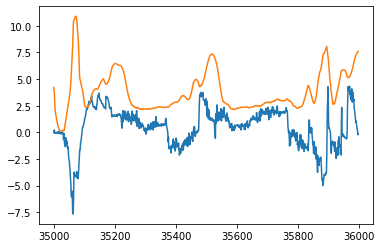

In [14]:
import matplotlib.pyplot as plt
#data3 = data[1000:].reset_index(drop=True)
plt.plot(data.iloc[35000:35999,0])
plt.plot(data2.iloc[35000:35999,-1])

In [19]:
data.shape

(72000, 12)

In [31]:
data2.head(21)

,joint_0,joint_1,joint_2,joint_3,joint_4,joint_5,force_mean,Fx_mean,Fy_mean,Fz_mean
0,1.404830,-1.171765,2.483047,-2.862827,-1.566874,2.720634,0.000000,NaN,NaN,NaN
1,1.404794,-1.171765,2.483070,-2.862839,-1.566886,2.720623,0.000000,NaN,NaN,NaN
2,1.404842,-1.171752,2.483034,-2.862851,-1.566910,2.720611,0.000000,NaN,NaN,NaN
3,1.404818,-1.171752,2.483070,-2.862839,-1.566910,2.720634,0.000000,NaN,NaN,NaN
4,1.404806,-1.171777,2.483058,-2.862863,-1.566886,2.720611,0.000000,NaN,NaN,NaN
5,1.404782,-1.171777,2.483034,-2.862851,-1.566910,2.720623,0.000000,NaN,NaN,NaN
6,1.404818,-1.171777,2.483082,-2.862863,-1.566898,2.720611,0.000000,NaN,NaN,NaN
7,1.404842,-1.171765,2.483058,-2.862851,-1.566886,2.720611,0.000000,NaN,NaN,NaN
8,1.404818,-1.171765,2.483070,-2.862815,-1.566886,2.720623,0.000000,NaN,NaN,NaN
9,1.404830,-1.171789,2.483047,-2.862851,-1.566922,2.720646,0.000000,NaN,NaN,NaN


Make trajectory batches of 1000 samples each.
shuffle batches then cancatenate back into a single data frame. 

In [32]:
n=1000
batches = [data2[i:i + n] for i in range(0, len(data2), n)]

random.seed(42)
#random.shuffle(batches)
print(len(batches))

## remove first 10 samples from each trajectory.
# trimmed_data = [traj[10:] for traj in batches]
# print(len(trimmed_data[7]))

## change first 20 samples to zeros.
for i in range(10):
    print(i)
    zeroed_data = []
    for batch in batches:
        batch.iloc[:20,i] = 0
        
        zeroed_data.append(batch)

all_data = np.concatenate(zeroed_data) # Training data.
# val_data = np.concatenate(batches[60:70]) # Validation data, used to tune network.
# test_data = np.concatenate(batches[70:79]) # Testing data, kept seperate from network until final testing.

all_data = pd.DataFrame(all_data, columns=columns)
all_data.head(25)

72
0
1
2
3
4
5
6
7
8
9


/home/ur10pc/anaconda3/envs/pytorch/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/ur10pc/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,joint_0,joint_1,joint_2,joint_3,joint_4,joint_5,force_mean,Fx_mean,Fy_mean,Fz_mean
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
#import matplotlib.pyplot as plt
#data3 = data[1000:].reset_index(drop=True)
#plt.plot(data.iloc[35000:35999,-3:-1])
plt.plot(data2.iloc[35000:35999,4:8])


In [ ]:
print(len(batches ))
plt.plot(batches[35].iloc[:,-1])

Save new data frame as csv file.

In [33]:
all_data.to_csv("/home/ur10pc/Desktop/robot_data2/80k_data/6_joints_mean_force_components_and_vectorsum_zeroed_columns.csv", index=False)
display(all_data)

,joint_0,joint_1,joint_2,joint_3,joint_4,joint_5,force_mean,Fx_mean,Fy_mean,Fz_mean
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
71995,2.518909,-0.658688,1.282793,-2.225488,-1.569965,2.198264,5.038129,2.047499,-3.586002,-0.730501
71996,2.506789,-0.668864,1.305049,-2.237184,-1.569701,2.195798,4.659258,1.859999,-3.070502,-0.553001
71997,2.495376,-0.679016,1.327103,-2.248484,-1.569402,2.192206,4.305321,1.720499,-2.579001,-0.376001
71998,2.485090,-0.689396,1.349792,-2.260191,-1.568935,2.187465,3.918005,1.546000,-2.106501,-0.166001


In [ ]:
data = pd.read_csv("/home/ur10pc/Desktop/robot_data2/80k_data/mean_force_data.csv")
display(data)

In [ ]:
data.shape